In [2]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

In [3]:
engine = create_engine("sqlite:///sqlite_db/mhp_db.sqlite")
Base = automap_base()

In [4]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables

In [5]:
Base.classes.keys()

['city', 'income', 'mental']

In [6]:
# saving references for each table
City = Base.classes.city
Incomes = Base.classes.income
Mental = Base.classes.mental

In [7]:
# Creating a session link to the DB
session = Session(engine)

In [8]:
# Test Queries
results = []
results = session.query(City.city, City.state_id, City.state_name, City.population, City.density).all()

In [9]:
# Creating DF from DB tables
city_df = pd.DataFrame(results, columns=['City','State_ID', 'State_Name', 'Population', 'Density'])
city_df.set_index(city_df['City'], inplace= True)
city_df.head()
#print(city_df.to_string(index=False))
#city_df.head()

,City,State_ID,State_Name,Population,Density
City,,,,,
New York,New York,NY,New York,18713220,10715
Los Angeles,Los Angeles,CA,California,12750807,3276
Chicago,Chicago,IL,Illinois,8604203,4574
Miami,Miami,FL,Florida,6445545,5019
Dallas,Dallas,TX,Texas,5743938,1526


In [10]:
# Test Queries
city_over_1000000 = []
city_over_100000 = session.query(City.city, City.state_id, City.state_name, City.population, City.density).filter(City.population >= 1000000).all()
#print(city_over_100000)

# Creating DF from DB tables
big_city_df = pd.DataFrame(city_over_100000, columns=['City','State_ID', 'State_Name', 'Population', 'Density']).head()
big_city_df

,City,State_ID,State_Name,Population,Density
0,New York,NY,New York,18713220,10715
1,Los Angeles,CA,California,12750807,3276
2,Chicago,IL,Illinois,8604203,4574
3,Miami,FL,Florida,6445545,5019
4,Dallas,TX,Texas,5743938,1526


<BarContainer object of 5 artists>

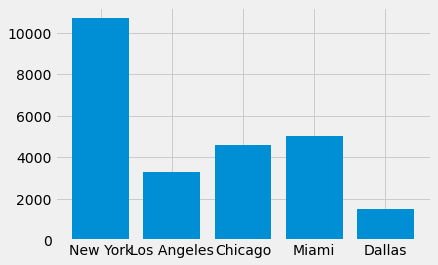

In [11]:
top_5_dense_cities = plt.bar(big_city_df['City'], big_city_df['Density'])
top_5_dense_cities

In [12]:
city_df_query = session.query(City.city, City.state_id, City.state_name, City.population, City.density).all()
city_df = pd.DataFrame(city_df_query, columns=['City','State_ID', 'State_Name', 'Population', 'Density'])
city_df.head()

,City,State_ID,State_Name,Population,Density
0,New York,NY,New York,18713220,10715
1,Los Angeles,CA,California,12750807,3276
2,Chicago,IL,Illinois,8604203,4574
3,Miami,FL,Florida,6445545,5019
4,Dallas,TX,Texas,5743938,1526
